# 2. 画像処理の基礎知識

## 2.1 画像データを読み込んで表示する

- code 2.1 画像読み込みに使うモジュール

In [37]:
from PIL import Image

In [38]:
import numpy as np

- code 2.2 グレースケール画像の読み込みと表示

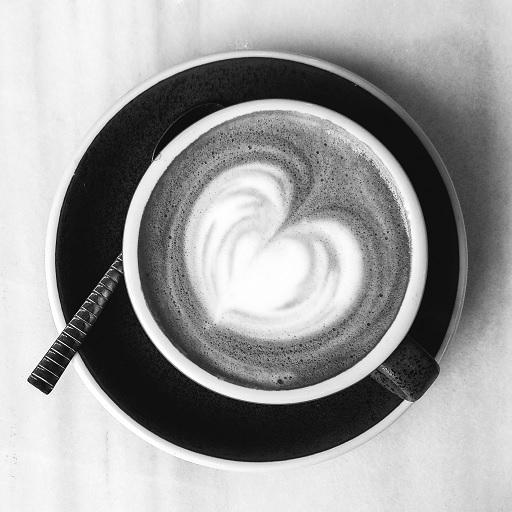

In [39]:
img_gray = Image.open('data/coffee.jpg')
display(img_gray)

- code 2.3 配列の形と画素値の確認

In [40]:
print(f'グレースケール画像を保持する配列の形: {np.array(img_gray).shape}')
print(f'グレースケール画像の(120, 120)における画素値: {img_gray.getpixel((120, 120))}')

グレースケール画像を保持する配列の形: (512, 512)
グレースケール画像の(120, 120)における画素値: 22


- code 2.5 カラー画像

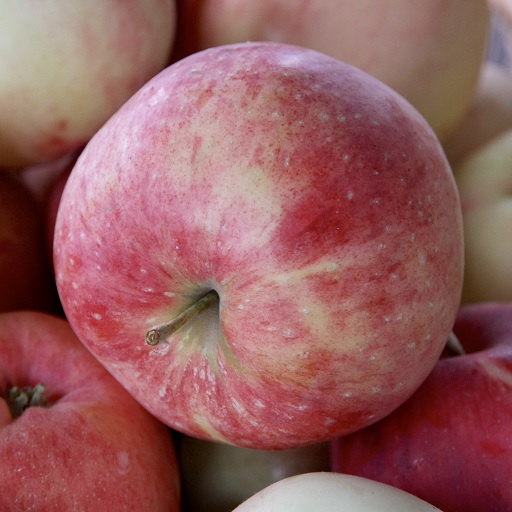

In [41]:
img_color = Image.open('data/apple.jpg')
display(img_color)

In [42]:
print(f'カラースケール画像を保持する配列の形: {np.array(img_color).shape}')
print(f'カラースケール画像の(120, 120)における画素値: {img_color.getpixel((120, 120))}')

カラースケール画像を保持する配列の形: (512, 512, 3)
カラースケール画像の(120, 120)における画素値: (223, 194, 214)


## 2.2 画像に平滑化フィルタをかける

[ソース](https://github.com/py-img-recog/python_image_recognition/blob/main/2_img_basics/2_2_smoothing_filter.ipynb)

- 2次元ガウシアン関数
$$
G(x,y)=
\frac{1}{\sqrt{2\pi\sigma^2}}
\exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)
$$

In [43]:
import numpy as np

# ガウシアン関数
def Gaussian(sigma=1.0):
    # パラメータ
    n = 100
    # 格子点を作成
    x = np.linspace(-3*sigma, 3*sigma, n)
    y = np.linspace(-3*sigma, 3*sigma, n)
    X, Y = np.meshgrid(x, y)
    return X, Y, (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))

In [44]:
from common import draw_3d_pyplot

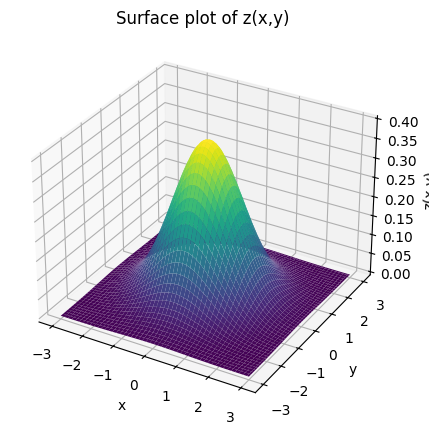

In [45]:
draw_3d_pyplot(*Gaussian())

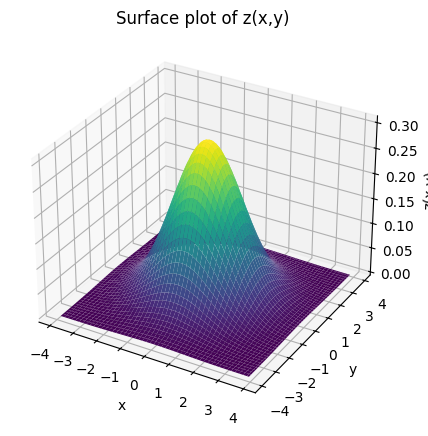

In [46]:
draw_3d_pyplot(*Gaussian(sigma=1.3))

In [47]:
from common import draw_3d_plotly

In [48]:
draw_3d_plotly(*Gaussian())

- code 2.7 ガウシアンカーネルを生成する関数
$$
G(x,y)=
\frac{1}{\sqrt{2\pi\sigma^2}}
\exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)
$$

In [49]:
def generate_gaussian_kernel(
        kernel_width: int,
        kernel_height: int,
        sigma: float
        )->float:
    """
    ガウシアンカーネルの生成関数

    Args:
        kernel_width  (int): 生成するカーネルの幅
        kernel_height (int): 生成するカーネルの高さ
        sigma         (float): カーネルの値を決めるガウス分布の標準偏差

    Returns:
        float: ガウシアンカーネル

    Raises:
        AssertionError: カーネルの大きさが偶数である場合

    Examples:
        >>> function_name(1)
        expected_output
        >>> function_name(2, arg2="value")
        expected_output
    """
    # カーネルの大きさを奇数に限定に限定
    assert kernel_width % 2 == 1 and kernel_height % 2 == 1, 'カーネルの大きさは奇数でないといけない'

    # カーネル用の変数を用意
    kernel = np.empty((kernel_height, kernel_width))

    for y in range(-(kernel_height // 2), kernel_height // 2 + 1):
        for x in range(-(kernel_width // 2), kernel_width // 2 + 1):
            # ガウス分布から値を抽出しカーネルに代入
            h = -(x ** 2 + y  ** 2) / (2 * sigma ** 2)
            h = np.exp(h) / (2 * np.pi * sigma ** 2)
            kernel[y + kernel_height // 2, x + kernel_width // 2] = h

    # カーネルの和が1になるように正規化
    kernel /= np.sum(kernel)

    return kernel

- code 2.10 カーネルの生成

In [50]:
from common import disp_tex, disp_mat

In [51]:
disp_mat('kernel', kernel := generate_gaussian_kernel(5,5,1.3), n=7)

<IPython.core.display.Math object>

In [52]:
# generate_gaussian_kernel(4,4,1)

- code 2.8 畳み込み演算を行う関数
$$
\providecommand{\width}{\lfloor W/2 \rfloor}
\providecommand{\height}{\lfloor H/2 \rfloor}

I_g(x,y)=\bm{K}*\bm{I_o}=
\sum_{u=-\width}^{\width}\sum_{v=-\height}^{\height} K(u+\width,v+\height)\, I_o(x+u,y+v)
$$

- code 2.9 画像にカーネルを適用する関数

- code 2.12 ガウシアンフィルタの適用